<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-deep-learning/blob/main/CNN_CIFAR10_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()          # (32,32,3)    * 60000

print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Labels: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels: (10000, 1)


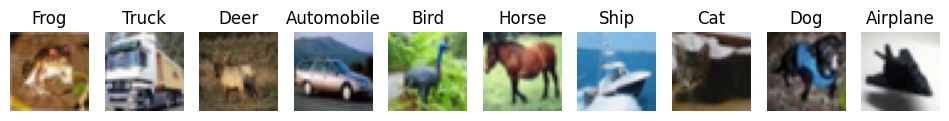

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

unique_images = []
unique_labels = []
for i in range(len(y_train)):
    label = y_train[i][0]
    if label not in unique_labels:
        unique_images.append(x_train[i])
        unique_labels.append(label)
    if len(unique_labels) == 10:
        break

# print(unique_images)
# print(unique_labels)

plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(unique_images[i])
    plt.title(class_names[unique_labels[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Data Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**parNumConv1**=(kernel x kernel x channels + bias) x filters=(3x3x3+1)x32=**896**      ,  Output=(32,32,32)

**parNumPool1**=**0**         ,     Output=(16,16,32)

**parNumConv2**=(kernel x kernel x channels + bias) x filters=(3x3x32+1)x64=**18496**       ,      Output=(16,16,64)

**parNumPool2**=**0**       , Output=(8,8,64)

**parNumFelatten**=**0**       , Output=(4096)

**parNumDens1**=**524416**       , Output=(128)

**parNumDens2**=**1290**       , Output=(10)


In [ ]:
model = Sequential([
        Conv2D(input_shape=(32, 32, 3),filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Flatten(),

        Dense(4096, activation='relu'),
        Dropout(0.5),

        Dense(4096, activation='relu'),
        Dropout(0.5),

        Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,781,322 (140.31 MB)

 Trainable params: 36,778,698 (140.30 MB)

 Non-trainable params: 2,624 (10.25 KB)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath="cifar10.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="max",
                             verbose=1)

early_stopping = EarlyStopping(monitor="val_accuracy",
                               patience=3,
                               restore_best_weights=True,
                               verbose=1)


history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3416 - loss: 2.8120
Epoch 1: val_accuracy improved from -inf to 0.50300, saving model to cifar10.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 53ms/step - accuracy: 0.3417 - loss: 2.8108 - val_accuracy: 0.5030 - val_loss: 1.4521
Epoch 2/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5641 - loss: 1.2813
Epoch 2: val_accuracy improved from 0.50300 to 0.55320, saving model to cifar10.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5642 - loss: 1.2811 - val_accuracy: 0.5532 - val_loss: 1.3627
Epoch 3/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6496 - loss: 1.0508
Epoch 3: val_accuracy did not improve from 0.55320
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.6496 - loss: 1.0508 - val_accuracy: 0.5254 - val_loss: 1.4171
Epoch 4/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7120 - loss: 0.8803
Epoch 4: val_accuracy improved from 0.55320 to 0.72240, saving model to cifar10.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 41ms/step - accuracy: 0.7121 - loss: 0.8802 - val_accuracy: 0.7224 - val_loss: 0.8491
Epoch 5/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7572 - loss: 0.7407
Epoch 5: val_accuracy did not improve from 0.72240
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.7572 - loss: 0.7407 - val_accuracy: 0.7053 - val_loss: 0.9090
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8075 - loss: 0.5959
Epoch 6: val_accuracy did not improve from 0.72240
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8075 - loss: 0.5960 - val_accuracy: 0.7181 - val_loss: 0.8785
Epoch 7/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8348 - loss: 0.5034
Epoch 7: val_accuracy did not improve from 0.72240
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8348 - loss: 0.5035 - val_accuracy: 0.7111 - val_loss: 0.8865
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


In [ ]:
best_model = load_model("cifar10.h5")

In [ ]:
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 4s - 13ms/step - accuracy: 0.7224 - loss: 0.8491
Test Accuracy: 72.24%


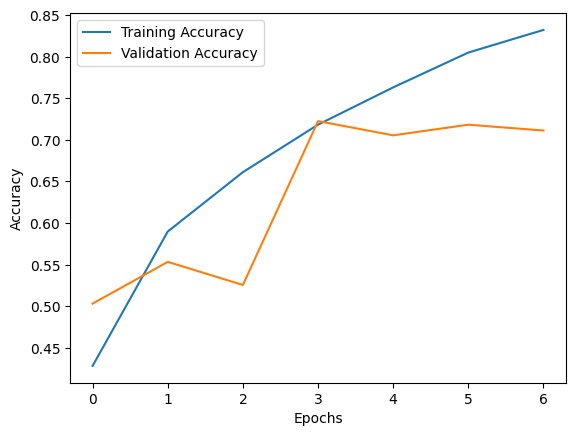

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()